In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
# Load the dataset
df = pd.read_csv('data.csv')
columns_to_drop=['diagnosis' ,'Unnamed: 32']
dropped_df= df.drop(columns = columns_to_drop, axis=1 )
diagnosis = df['diagnosis']

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_df = scaler.fit_transform(dropped_df)

In [111]:
import numpy as np

def k_means(X, k, max_iters=100, tolerance=1e-4):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_centroids = centroids.copy()

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(k):
            if np.sum(labels == i) > 0:
                centroids[i] = np.mean(X[labels == i], axis=0)

        # Check for convergence
        if np.linalg.norm(centroids - prev_centroids) < tolerance:
            break

        prev_centroids = centroids.copy()

    return labels, centroids

# Example usage:
#labels, centroids = k_means(standard_df, k=3)
# print(labels,centroids)

Number of clusters: 1
Sum of Squared Distances (Inertia): [17639.0]
Number of clusters: 2
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172]
Number of clusters: 3
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967]
Number of clusters: 4
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 10152.14045232892]
Number of clusters: 5
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 10152.14045232892, 9130.760338491873]
Number of clusters: 6
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 10152.14045232892, 9130.760338491873, 8698.834720819697]
Number of clusters: 7
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 10152.14045232892, 9130.760338491873, 8698.834720819697, 8201.963304208186]
Number of clusters: 8
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 10152.

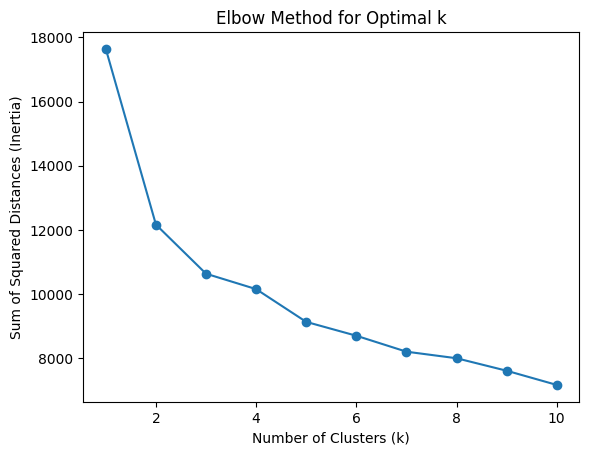

In [112]:
import numpy as np
import matplotlib.pyplot as plt

#Experiment 1
def elbow_method(X, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        labels, centroids = k_means(X, k)
        distortion = np.sum((X - centroids[labels]) ** 2)
        distortions.append(distortion)
        print("Number of clusters:", k)
        print("Sum of Squared Distances (Inertia):", distortions)
    return distortions

# Assuming standard_df is your standardized data
max_clusters = 10

# Run the elbow method
distortions = elbow_method(standard_df, max_clusters)
# Plot the elbow method results
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()





From elbow method we deduced that at k=2 the rate of decrease in inertia sharply changes, and adding more clusters beyond that point provides diminishing.

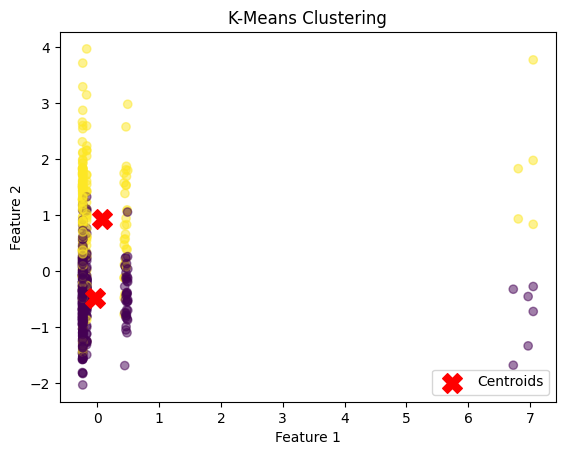

In [113]:
def plot_clusters(X, labels, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
# Find the optimal number of clusters (k) using the elbow method
optimal_k = 2

# Apply K-Means with the optimal k
optimal_labels, optimal_centroids = k_means(standard_df, optimal_k)
plot_clusters(standard_df,optimal_labels,optimal_centroids)
# Now, optimal_labels contains the cluster assignments for each data point
# optimal_centroids contains the centroids of the clusters

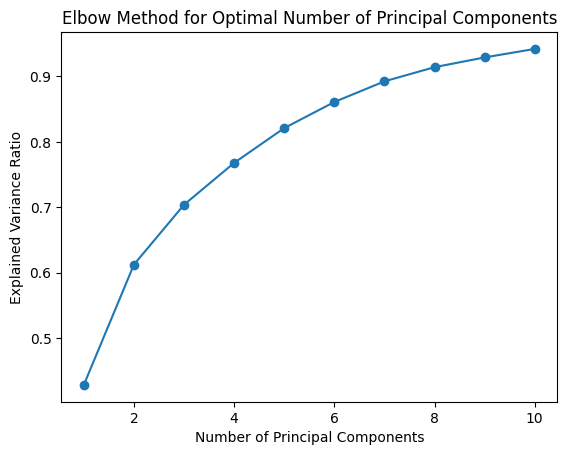

In [114]:
def pca(X, num_components):
    # Calculate covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Choose the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the original data onto the new subspace
    pca_result = np.dot(X, principal_components)

    return pca_result

  # Elbow method to determine the optimal number of principal components
def elbow_method_pca(X, max_components):
    explained_variances = []
    for num_components in range(1, max_components + 1):
        pca_result = pca(X, num_components)
        explained_variance = np.sum(pca_result.var(axis=0)) / np.sum(X.var(axis=0))
        explained_variances.append(explained_variance)
    return explained_variances

# Assuming standard_df is your standardized data
max_components = 10

# Run the elbow method for PCA
explained_variances = elbow_method_pca(standard_df, max_components)

# Plot the elbow method results
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.title('Elbow Method for Optimal Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()




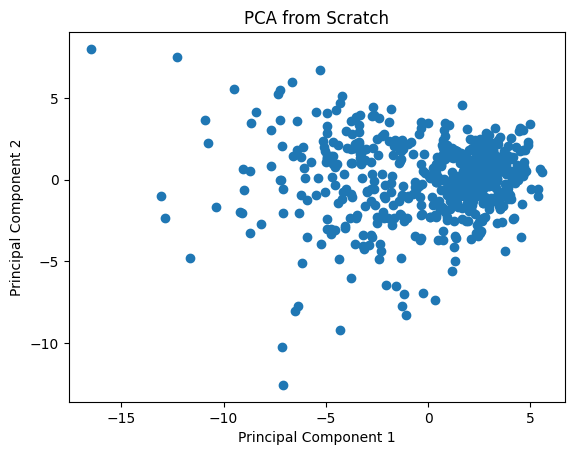

Number of clusters: 1
Sum of Squared Distances (Inertia): [10802.386923212154]
Number of clusters: 2
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885]
Number of clusters: 3
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885, 3869.1668813241286]
Number of clusters: 4
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885, 3869.1668813241286, 3210.210590363775]
Number of clusters: 5
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885, 3869.1668813241286, 3210.210590363775, 2525.449296576845]
Number of clusters: 6
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885, 3869.1668813241286, 3210.210590363775, 2525.449296576845, 2268.990171169801]
Number of clusters: 7
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.5499124440885, 3869.1668813241286, 3210.210590363775, 2525.449296576845, 2268.990171169801, 1880.555086661702]
Number of clusters: 8
Sum of Squared 

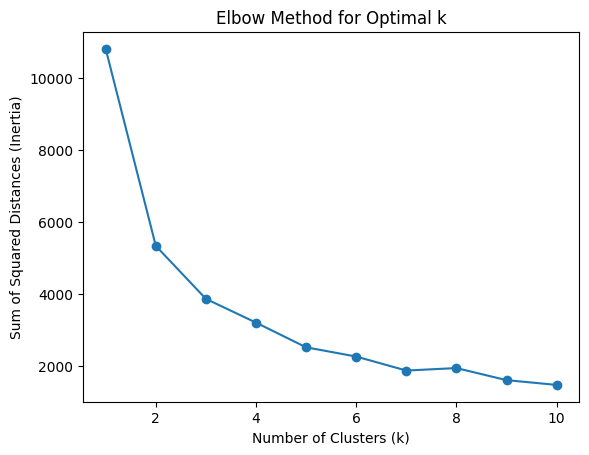

In [120]:
num_components = 2  # Choose the desired number of principal components
pca_result = pca(standard_df, num_components)

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA from Scratch')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Assuming you have the elbow_method function implemented
max_clusters = 10
distortions_pca = elbow_method(pca_result, max_clusters)
# Plot the elbow method results
plt.plot(range(1, max_clusters + 1), distortions_pca, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()



optimal k=2 after applying pca


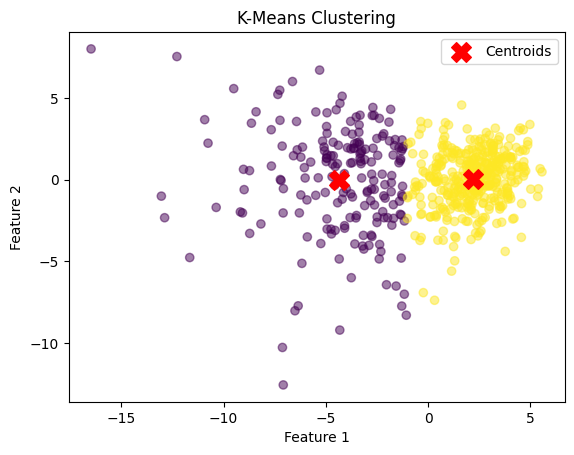

In [116]:
optimal_k=2
optimal_labels, optimal_centroids = k_means(pca_result, optimal_k)
plot_clusters(pca_result,optimal_labels,optimal_centroids)

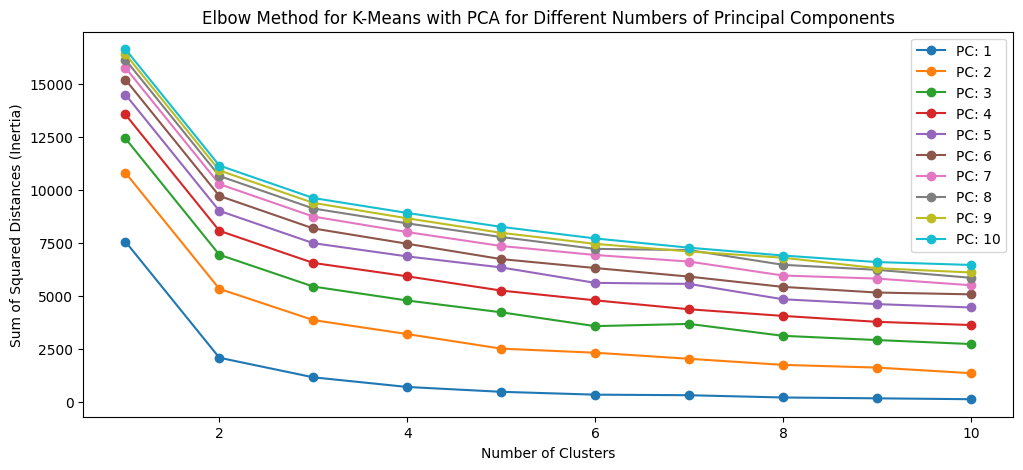

In [117]:
def elbow_method_kmeans(X, max_clusters):
    distortions = []
    for k in range(1, max_clusters + 1):
        labels, centroids = k_means(X, k)
        distortion = np.sum((X - centroids[labels]) ** 2)
        distortions.append(distortion)
    return distortions

# Experiment with different numbers of principal components
num_components_list = list(range(1, 11))  # Adjust as needed
max_clusters = 10

plt.figure(figsize=(12, 5))

for num_components in num_components_list:
    # Apply PCA
    pca_result = pca(standard_df, num_components)

    # Run the elbow method for K-Means clustering on PCA-transformed data
    distortions = elbow_method_kmeans(pca_result, max_clusters)

    # Plot the elbow method results for different numbers of principal components
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', label=f'PC: {num_components}')

plt.title('Elbow Method for K-Means with PCA for Different Numbers of Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.legend()
plt.show()


Number of clusters: 1
Sum of Squared Distances (Inertia): [10802.386923212154]
Number of clusters: 2
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765]
Number of clusters: 3
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765, 3869.693944519684]
Number of clusters: 4
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765, 3869.693944519684, 3205.311608368252]
Number of clusters: 5
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765, 3869.693944519684, 3205.311608368252, 2525.096880307082]
Number of clusters: 6
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765, 3869.693944519684, 3205.311608368252, 2525.096880307082, 2332.475027570421]
Number of clusters: 7
Sum of Squared Distances (Inertia): [10802.386923212154, 5338.160151156765, 3869.693944519684, 3205.311608368252, 2525.096880307082, 2332.475027570421, 1880.7419085260567]
Number of clusters: 8
Sum of Squared Distances 

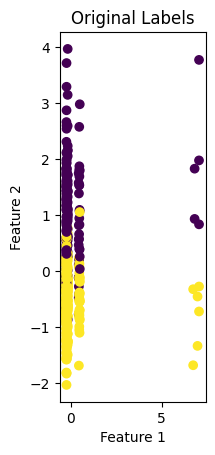

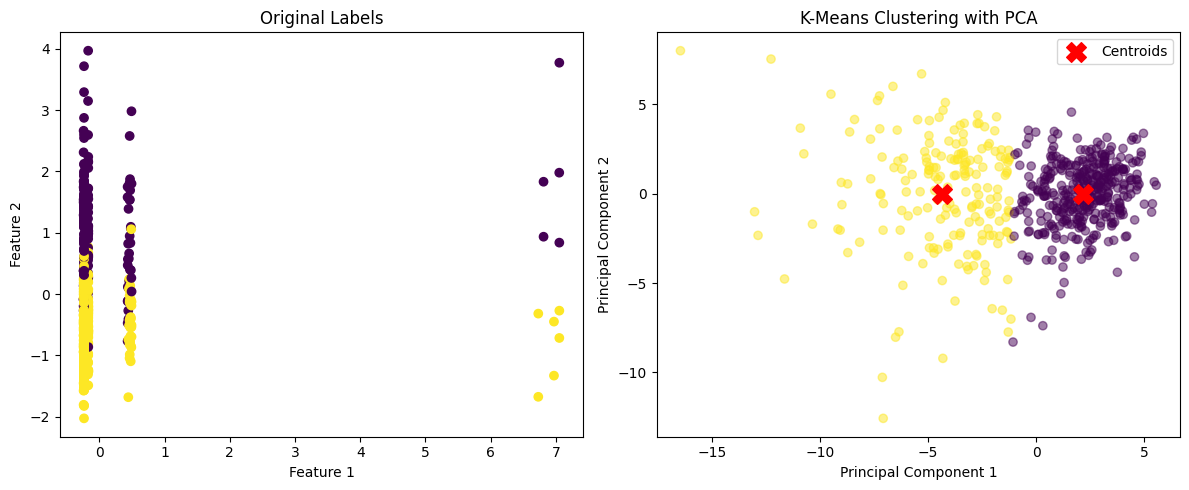

Number of clusters: 1
Sum of Squared Distances (Inertia): [12415.726705587193]
Number of clusters: 2
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252]
Number of clusters: 3
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252, 5439.66412012314]
Number of clusters: 4
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252, 5439.66412012314, 4829.458797518557]
Number of clusters: 5
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252, 5439.66412012314, 4829.458797518557, 4193.965941605549]
Number of clusters: 6
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252, 5439.66412012314, 4829.458797518557, 4193.965941605549, 3895.1046665595263]
Number of clusters: 7
Sum of Squared Distances (Inertia): [12415.726705587193, 6943.876112930252, 5439.66412012314, 4829.458797518557, 4193.965941605549, 3895.1046665595263, 3325.7812412732733]
Number of clusters: 8
Sum of Squared Distances (In

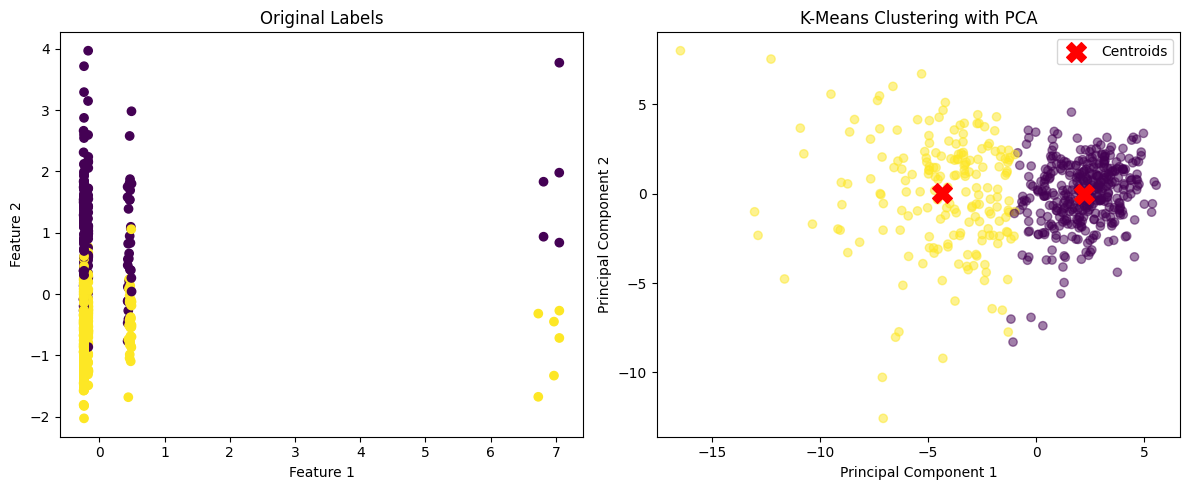

Number of clusters: 1
Sum of Squared Distances (Inertia): [13543.118938969059]
Number of clusters: 2
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497]
Number of clusters: 3
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497, 6558.724130369161]
Number of clusters: 4
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497, 6558.724130369161, 5890.37651813011]
Number of clusters: 5
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497, 6558.724130369161, 5890.37651813011, 5259.7435664333025]
Number of clusters: 6
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497, 6558.724130369161, 5890.37651813011, 5259.7435664333025, 4863.237994001411]
Number of clusters: 7
Sum of Squared Distances (Inertia): [13543.118938969059, 8070.105586853497, 6558.724130369161, 5890.37651813011, 5259.7435664333025, 4863.237994001411, 4362.562614561334]
Number of clusters: 8
Sum of Squared Distances (I

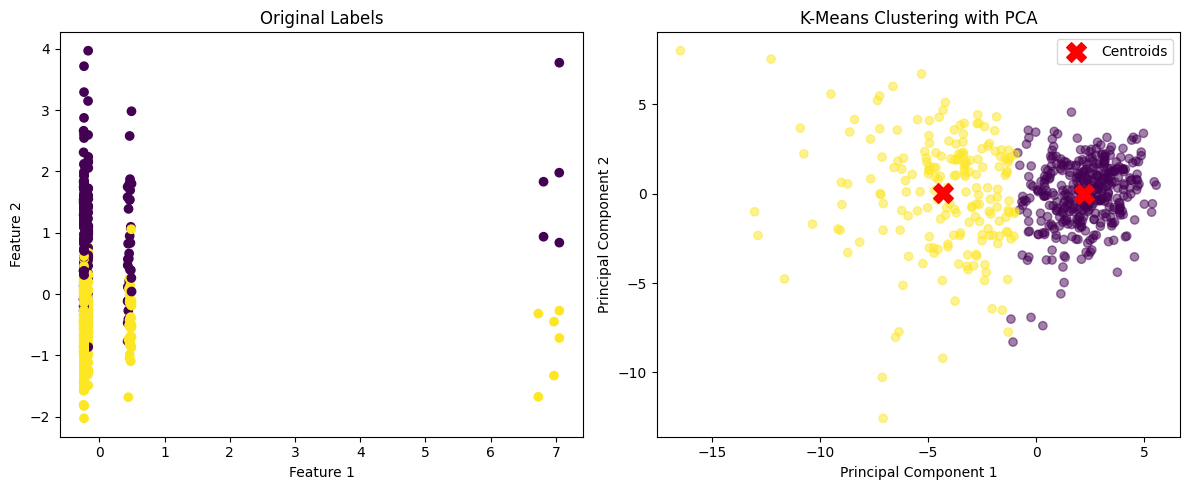

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [118]:
plt.subplot(1, 3, 1)
plt.scatter(standard_df[:, 0], standard_df[:, 1], c=diagnosis.map({'M': 0, 'B': 1}), cmap='viridis')
plt.title('Original Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# # Function to visualize clusters and compare with original labels
def visualize_clusters_comparison(X_original, labels_original, X_transformed, labels_transformed, centroids_transformed):
     # Visualize original labels
     plt.figure(figsize=(12, 5))

     plt.subplot(1, 2, 1)
     plt.scatter(standard_df[:, 0], standard_df[:, 1], c=diagnosis.map({'M': 0, 'B': 1}), cmap='viridis')
     plt.title('Original Labels')
     plt.xlabel('Feature 1')
     plt.ylabel('Feature 2')

     # Visualize clusters with PCA-transformed data
     plt.subplot(1, 2, 2)
     plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels_transformed, cmap='viridis', alpha=0.5)
     plt.scatter(centroids_transformed[:, 0], centroids_transformed[:, 1], c='red', marker='X', s=200, label='Centroids')
     plt.title('K-Means Clustering with PCA')
     plt.xlabel('Principal Component 1')
     plt.ylabel('Principal Component 2')
     plt.legend()

     plt.tight_layout()
     plt.show()

 # Experiment with different numbers of principal components
num_components_list = [2, 3, 4]
for num_components in num_components_list:
     # Apply PCA with different numbers of components
     pca_result = pca(standard_df, num_components)

     # Determine optimal k using elbow method on PCA-transformed data
     max_clusters = 10
     distortions_pca = elbow_method(pca_result, max_clusters)

     # Choose optimal k
     optimal_k = 2  # Replace with the value obtained from the elbow method for PCA

     # Apply K-Means with optimal k on PCA-transformed data
     labels_pca, centroids_pca = k_means(pca_result, optimal_k)

     # Visualize clusters and compare with original labels
     visualize_clusters_comparison(standard_df[:, :2], diagnosis, pca_result, labels_pca, centroids_pca)
plt.figure(figsize=(12, 5))


pc=2 gives least sum of squared distance

as shown the differnce between original labels and pca and k-means(clustring) squared error/distances is much smaller after applying pca


Number of clusters: 1
Sum of Squared Distances (Inertia): [17639.0]
Number of clusters: 2
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172]
Number of clusters: 3
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967]
Number of clusters: 4
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 9900.081156586168]
Number of clusters: 5
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 9900.081156586168, 9262.91333937766]
Number of clusters: 6
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 9900.081156586168, 9262.91333937766, 8970.322903072683]
Number of clusters: 7
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 9900.081156586168, 9262.91333937766, 8970.322903072683, 8310.823096442497]
Number of clusters: 8
Sum of Squared Distances (Inertia): [17639.0, 12163.187290220172, 10632.250885028967, 9900.0811

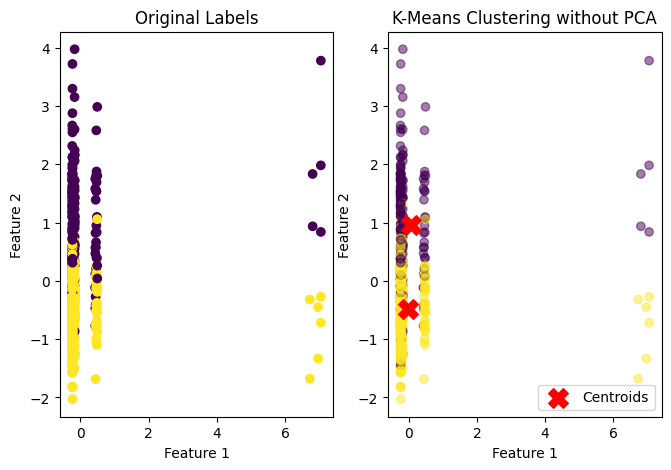

In [119]:

# Function to visualize clusters and compare with original labels
def visualize_clusters_comparison(X_original, labels_original, labels_clusters, centroids_clusters):
    # Visualize original labels
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(X_original[:, 0], X_original[:, 1], c=labels_original, cmap='viridis')
    plt.title('Original Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Visualize clusters without PCA-transformed data
    plt.subplot(1, 3, 2)
    plt.scatter(X_original[:, 0], X_original[:, 1], c=labels_clusters, cmap='viridis', alpha=0.5)
    plt.scatter(centroids_clusters[:, 0], centroids_clusters[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-Means Clustering without PCA')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()


# Experiment without PCA
# Determine optimal k using elbow method on original data
max_clusters = 10
distortions_original = elbow_method(standard_df, max_clusters)

# Choose optimal k
optimal_k_original = 2  # Replace with the value obtained from the elbow method without PCA

# Apply K-Means with optimal k on original data
labels_original, centroids_original = k_means(standard_df, optimal_k_original)

# Visualize clusters and compare with original labels
visualize_clusters_comparison(standard_df[:, :2], diagnosis.map({'M': 0, 'B': 1}), labels_original, centroids_original)


as shown from both graphs, there is no big difference between original labels and labels of centroids after k-means

we deduced from experiment 1 and experiment 2 that squared error/distances decreased after applying pca(dimensionality reduction) and gives much better scattered graph and classifiers